In [1]:
import os
import copy
import pickle
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
import deepdish as dd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import palettable


from astropy.utils.console import ProgressBar
from astropy.table import QTable
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 28})

In [2]:
data_dir="/Users/xushuo/work/Submit/Simulation/data/"
fig_dir="/Users/xushuo/work/Papers/Simulation/Figure/"
fname='galaxies_tng300_072_share.hdf5'#file with those data points in fig3

In [3]:
# slope and scatter for the kpc aperture/outskirt
# solid points without additional uncertainty on stellar mass
slope_aper_tab0=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/direct/slope_aperture')
slope_out_tab0=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/direct/slope_outskirt')
scatter_aper_tab0=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/direct/scatter_aperture')
scatter_out_tab0=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/direct/scatter_outskirt')

In [4]:
# slope and scatter for the kpc aperture/outskirt
# hollow points with additional uncertainty on stellar mass
slope_aper_tab1=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/uncertainty/slope_aperture')
slope_out_tab1=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/uncertainty/slope_outskirt')
scatter_aper_tab1=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/uncertainty/scatter_aperture')
scatter_out_tab1=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/physical_fit/uncertainty/scatter_outskirt')

In [5]:
# slope and scatter for the Re aperture/outskirt
# solid points without additional uncertainty on stellar mass
slope_aper_tab2=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/direct/slope_aperture')
slope_out_tab2=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/direct/slope_outskirt')
scatter_aper_tab2=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/direct/scatter_aperture')
scatter_out_tab2=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/direct/scatter_outskirt')

In [6]:
# slope and scatter for the Re aperture/outskirt
# hollow points with additional uncertainty on stellar mass
slope_aper_tab3=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/uncertainty/slope_aperture')
slope_out_tab3=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/uncertainty/slope_outskirt')
scatter_aper_tab3=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/uncertainty/scatter_aperture')
scatter_out_tab3=dd.io.load(data_dir+'galaxies_tng300_072_share.hdf5','/reff_fit/uncertainty/scatter_outskirt')

In [7]:
#aperture_size: in kpc
#_err: error of slope
slope_aper_tab0

aperture_size,slope_aper_ins_xy,slope_aper_ins_xy_err,slope_aper_ins_yz,slope_aper_ins_yz_err,slope_aper_ins_xz,slope_aper_ins_xz_err,slope_aper_exs_xy,slope_aper_exs_xy_err,slope_aper_exs_yz,slope_aper_exs_yz_err,slope_aper_exs_xz,slope_aper_exs_xz_err,slope_aper_gal_xy,slope_aper_gal_xy_err,slope_aper_gal_yz,slope_aper_gal_yz_err,slope_aper_gal_xz,slope_aper_gal_xz_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
30,1.0375100946713927,0.03836331675404898,1.0554309111501654,0.04035800802289962,1.0615227819200788,0.041094429249268045,1.540337629030485,0.03417524302958444,1.4844806413850014,0.028282646010427966,1.5316253617675228,0.030851350941186236,1.6765516561202243,0.028185983241907638,1.6648665035830208,0.026500539990246957,1.6984477086416099,0.02763804458662378
50,1.1706457840882705,0.04065863066152838,1.193029539085294,0.04412943824742402,1.1661497960760523,0.03828806709626653,1.4791845157196017,0.030326761183116075,1.4803636466633265,0.027759224552562294,1.4747122922711857,0.027232090898865722,1.592789243615738,0.022957103663195512,1.629001265911373,0.024755853445060923,1.6233428966875165,0.02477211118903026
75,1.2365642178403875,0.03665037801015433,1.2472741764543616,0.03944965680825253,1.245842672049815,0.03999509939522161,1.4199893161106845,0.025339059317302792,1.3726272073649048,0.022114350749606076,1.4226338636859779,0.024592783071679617,1.5357201453942304,0.020803183472571197,1.5467068689912367,0.020716535993236633,1.574029343379499,0.02153932455054234
100,1.2836189059079046,0.03704704192909386,1.2629703227910503,0.035733551274362,1.2709545700532465,0.035685394668992496,1.3590110119580336,0.022216686358212546,1.3649293156922535,0.02191872193677199,1.3668046829115088,0.021621139432626686,1.5109783599602755,0.019729033253836504,1.511371358531445,0.019695425400037624,1.5215804867855054,0.0205288020259944
150,1.302583405130598,0.036672136207438935,1.2901605387224984,0.03592908693730275,1.3036282743771097,0.03621591602993218,1.3019539484613718,0.01978450026025293,1.2978182050720792,0.01940675732599925,1.2962015520015697,0.01903467331764412,1.4578940476645144,0.018978836067641083,1.4661034429609345,0.01829246140067232,1.4640917561889928,0.01909501447899651


In [8]:
scatter_aper_tab2

aperture_size,scatter_aper_ins_xy,scatter_aper_ins_xy_err1,scatter_aper_ins_xy_err2,scatter_aper_ins_yz,scatter_aper_ins_yz_err1,scatter_aper_ins_yz_err2,scatter_aper_ins_xz,scatter_aper_ins_xz_err1,scatter_aper_ins_xz_err2,scatter_aper_exs_xy,scatter_aper_exs_xy_err1,scatter_aper_exs_xy_err2,scatter_aper_exs_yz,scatter_aper_exs_yz_err1,scatter_aper_exs_yz_err2,scatter_aper_exs_xz,scatter_aper_exs_xz_err1,scatter_aper_exs_xz_err2,scatter_aper_gal_xy,scatter_aper_gal_xy_err1,scatter_aper_gal_xy_err2,scatter_aper_gal_yz,scatter_aper_gal_yz_err1,scatter_aper_gal_yz_err2,scatter_aper_gal_xz,scatter_aper_gal_xz_err1,scatter_aper_gal_xz_err2,scatter_aper_ins_force_xy,scatter_aper_ins_force_xy_err1,scatter_aper_ins_force_xy_err2,scatter_aper_ins_force_yz,scatter_aper_ins_force_yz_err1,scatter_aper_ins_force_yz_err2,scatter_aper_ins_force_xz,scatter_aper_ins_force_xz_err1,scatter_aper_ins_force_xz_err2,scatter_aper_exs_force_xy,scatter_aper_exs_force_xy_err1,scatter_aper_exs_force_xy_err2,scatter_aper_exs_force_yz,scatter_aper_exs_force_yz_err1,scatter_aper_exs_force_yz_err2,scatter_aper_exs_force_xz,scatter_aper_exs_force_xz_err1,scatter_aper_exs_force_xz_err2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.2865252118088142,0.2819327219591537,0.2913671810819571,0.2868559768951536,0.2821449417993396,0.29167324593824573,0.2867527763830951,0.2820806483870408,0.2917271337035785,0.20439445614231944,0.20093684725394573,0.2080410034645893,0.20622871923398392,0.2027172757281368,0.20972413448271715,0.20363631819529213,0.2003409306577931,0.20719351632118357,0.19497966402213293,0.191978143727371,0.19821633276372955,0.19364931645303973,0.1905147799085627,0.19702293491794934,0.19372331165760412,0.1906760444778361,0.19686016338555865,0.3043092438402205,0.2992970558090143,0.30987693105316116,0.30146785530744163,0.2962977045311603,0.30664205795529725,0.30269627856118403,0.2977832557429297,0.3082255694024539,0.23560451853911377,0.23145036484985418,0.24003725945060878,0.2342232944607839,0.22990024996878533,0.2387476891530809,0.2306851518433555,0.22624524985803351,0.235403248515836
2,0.30282609821780565,0.29812186848403205,0.3081739174525945,0.2965724294773681,0.29217135893564755,0.30143935492890317,0.29549479446554877,0.29092881810350635,0.3003784285032929,0.2030067887186894,0.19940026063523056,0.20662307989142212,0.19990110679728956,0.19616968896052953,0.2037788294248492,0.2037088942047485,0.20034902176117167,0.20733538974446006,0.19631915912454034,0.1931169675808672,0.19967918154612618,0.1965280101875308,0.19331501451196662,0.20001225184133845,0.19659152491320275,0.1936058083439924,0.19992879263808253,0.2940555063406449,0.28941702687891013,0.2989382917533616,0.2927338674616576,0.2882742748516385,0.29798616781525483,0.30076752506963944,0.2957804505121351,0.30647284310864936,0.2227477140275214,0.2185481105808293,0.22697648742604665,0.22415423661029044,0.22001668919942163,0.22870139421569613,0.22405890481921864,0.2196500396202686,0.22829870118559087
3,0.29808574829604717,0.29337030189487695,0.30320639615282113,0.2988410243940016,0.2937792626208447,0.303716716494411,0.2997627847975266,0.2948273195369217,0.3048874983153254,0.20019712433494932,0.19674903774472355,0.204240056935721,0.20318386122180956,0.1995699395959537,0.2069303486276888,0.2029662949258377,0.19949058585860863,0.20660484346047314,0.19539161124609805,0.1921562509696993,0.19882880603187308,0.1966989856857296,0.19348588755802376,0.20017566932658556,0.1960938619235057,0.19292932859178039,0.19923973914501425,0.2855285558333832,0.2812164996690475,0.2902385177316845,0.2911729515061803,0.2865454654343134,0.29625183752872614,0.28694235612889085,0.28235658448507117,0.2916807940621720

In [25]:
#scatter
#aperture_size: in Re
#_err1: lower limit of errorbar
#_err2: upper limit of errorbar
scatter_aper_tab2

aperture_size,scatter_aper_ins_xy,scatter_aper_ins_xy_err1,scatter_aper_ins_xy_err2,scatter_aper_ins_yz,scatter_aper_ins_yz_err1,scatter_aper_ins_yz_err2,scatter_aper_ins_xz,scatter_aper_ins_xz_err1,scatter_aper_ins_xz_err2,scatter_aper_exs_xy,scatter_aper_exs_xy_err1,scatter_aper_exs_xy_err2,scatter_aper_exs_yz,scatter_aper_exs_yz_err1,scatter_aper_exs_yz_err2,scatter_aper_exs_xz,scatter_aper_exs_xz_err1,scatter_aper_exs_xz_err2,scatter_aper_gal_xy,scatter_aper_gal_xy_err1,scatter_aper_gal_xy_err2,scatter_aper_gal_yz,scatter_aper_gal_yz_err1,scatter_aper_gal_yz_err2,scatter_aper_gal_xz,scatter_aper_gal_xz_err1,scatter_aper_gal_xz_err2,scatter_aper_ins_force_xy,scatter_aper_ins_force_xy_err1,scatter_aper_ins_force_xy_err2,scatter_aper_ins_force_yz,scatter_aper_ins_force_yz_err1,scatter_aper_ins_force_yz_err2,scatter_aper_ins_force_xz,scatter_aper_ins_force_xz_err1,scatter_aper_ins_force_xz_err2,scatter_aper_exs_force_xy,scatter_aper_exs_force_xy_err1,scatter_aper_exs_force_xy_err2,scatter_aper_exs_force_yz,scatter_aper_exs_force_yz_err1,scatter_aper_exs_force_yz_err2,scatter_aper_exs_force_xz,scatter_aper_exs_force_xz_err1,scatter_aper_exs_force_xz_err2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.2865252118088142,0.2819327219591537,0.2913671810819571,0.2868559768951536,0.2821449417993396,0.29167324593824573,0.2867527763830951,0.2820806483870408,0.2917271337035785,0.20439445614231944,0.20093684725394573,0.2080410034645893,0.20622871923398392,0.2027172757281368,0.20972413448271715,0.20363631819529213,0.2003409306577931,0.20719351632118357,0.19497966402213293,0.191978143727371,0.19821633276372955,0.19364931645303973,0.1905147799085627,0.19702293491794934,0.19372331165760412,0.1906760444778361,0.19686016338555865,0.3043092438402205,0.2992970558090143,0.30987693105316116,0.30146785530744163,0.2962977045311603,0.30664205795529725,0.30269627856118403,0.2977832557429297,0.3082255694024539,0.23560451853911377,0.23145036484985418,0.24003725945060878,0.2342232944607839,0.22990024996878533,0.2387476891530809,0.2306851518433555,0.22624524985803351,0.235403248515836
2,0.30282609821780565,0.29812186848403205,0.3081739174525945,0.2965724294773681,0.29217135893564755,0.30143935492890317,0.29549479446554877,0.29092881810350635,0.3003784285032929,0.2030067887186894,0.19940026063523056,0.20662307989142212,0.19990110679728956,0.19616968896052953,0.2037788294248492,0.2037088942047485,0.20034902176117167,0.20733538974446006,0.19631915912454034,0.1931169675808672,0.19967918154612618,0.1965280101875308,0.19331501451196662,0.20001225184133845,0.19659152491320275,0.1936058083439924,0.19992879263808253,0.2940555063406449,0.28941702687891013,0.2989382917533616,0.2927338674616576,0.2882742748516385,0.29798616781525483,0.30076752506963944,0.2957804505121351,0.30647284310864936,0.2227477140275214,0.2185481105808293,0.22697648742604665,0.22415423661029044,0.22001668919942163,0.22870139421569613,0.22405890481921864,0.2196500396202686,0.22829870118559087
3,0.29808574829604717,0.29337030189487695,0.30320639615282113,0.2988410243940016,0.2937792626208447,0.303716716494411,0.2997627847975266,0.2948273195369217,0.3048874983153254,0.20019712433494932,0.19674903774472355,0.204240056935721,0.20318386122180956,0.1995699395959537,0.2069303486276888,0.2029662949258377,0.19949058585860863,0.20660484346047314,0.19539161124609805,0.1921562509696993,0.19882880603187308,0.1966989856857296,0.19348588755802376,0.20017566932658556,0.1960938619235057,0.19292932859178039,0.19923973914501425,0.2855285558333832,0.2812164996690475,0.2902385177316845,0.2911729515061803,0.2865454654343134,0.29625183752872614,0.28694235612889085,0.28235658448507117,0.2916807940621720

In [9]:
color_list=['steelblue','orangered','darkgrey']

In [10]:
# aperture mass
tab=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_mass')

In [11]:
sma_list=np.asarray([30,50,75,100,150])
mass_bin=np.arange(11.2,12.5,0.1)
apersize=np.asarray([30,50,100,150])
outer=np.asarray([30,50,75])

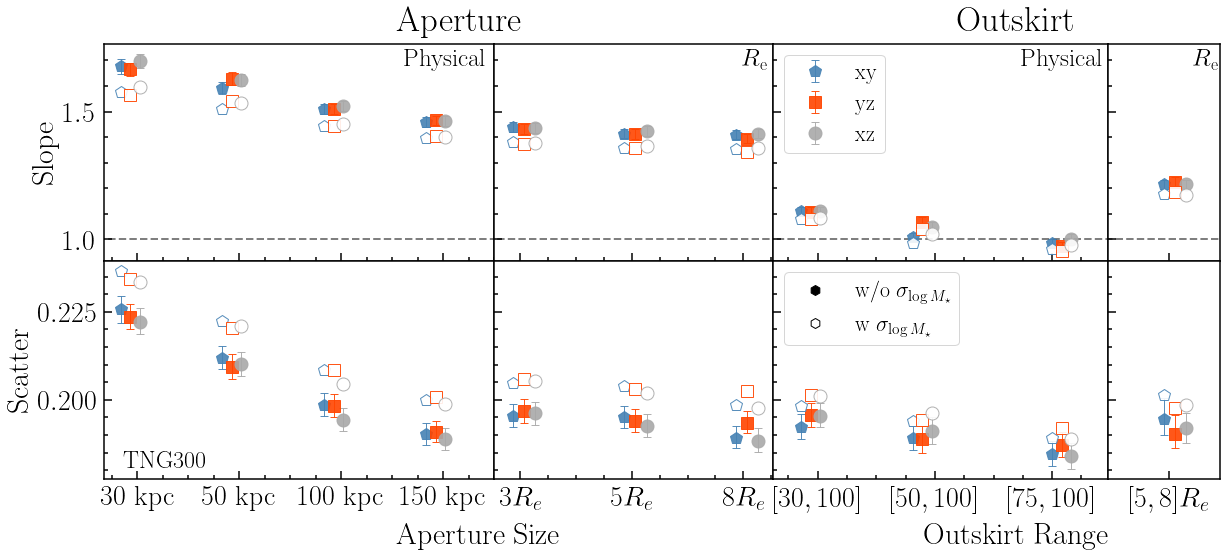

In [13]:
fig=plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(2,4, hspace=0, wspace=0,width_ratios=(0.35,0.25,0.3,0.1))
(ax11,ax12,ax21,ax22),(ax31,ax32,ax41,ax42) = gs.subplots(sharex='col', sharey='row')
projlist=['xy','yz','xz']
color_list=['steelblue','orangered','darkgrey']
fmtlist=['p','s','o']
mksize_list=[13,12,13]

scatter_aper_tab=scatter_aper_tab0[scatter_aper_tab0['aperture_size']!=75]
slope_aper_tab=slope_aper_tab0[slope_aper_tab0['aperture_size']!=75]
slope_out_tab=slope_out_tab0
scatter_out_tab=scatter_out_tab0
scatter_aper_tab_mock=scatter_aper_tab1[scatter_aper_tab1['aperture_size']!=75]
slope_aper_tab_mock=slope_aper_tab1[slope_aper_tab1['aperture_size']!=75]
slope_out_tab_mock=slope_out_tab1
scatter_out_tab_mock=scatter_out_tab1
apersize=np.asarray([30,60,90,120])
outer=np.asarray([30,50,75])

for ii in range(3):
    mksize=mksize_list[ii]
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii,ii])*2.8
    ax11.errorbar(apersize+i0,slope_aper_tab['slope_aper_gal_'+proj],yerr=slope_aper_tab['slope_aper_gal_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=4, capthick=1, elinewidth=1, markersize=mksize,label=proj+'_Origin')
    err1=scatter_aper_tab['scatter_aper_gal_'+proj]-scatter_aper_tab['scatter_aper_gal_'+proj+'_err1']
    err2=scatter_aper_tab['scatter_aper_gal_'+proj+'_err2']-scatter_aper_tab['scatter_aper_gal_'+proj]
    ax31.errorbar(apersize+i0,scatter_aper_tab['scatter_aper_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=4, capthick=1, elinewidth=1,fmt=fmt,markersize=mksize)
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab['slope_out_gal_'+proj],yerr=slope_out_tab['slope_out_gal_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=4, capthick=1, elinewidth=1, markersize=mksize,label=r'\rm '+proj)
    err1=scatter_out_tab['scatter_out_gal_'+proj]-scatter_out_tab['scatter_out_gal_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_gal_'+proj+'_err2']-scatter_out_tab['scatter_out_gal_'+proj]
    ax41.errorbar(outer+i0,scatter_out_tab['scatter_out_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=4, capthick=1, elinewidth=1,fmt=fmt,markersize=mksize)

for ii in range(3):
    mksize=mksize_list[ii]
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii,ii])*2.8
    ax11.errorbar(apersize+i0,slope_aper_tab_mock['slope_aper_gal_'+proj],mec=col,mfc='White',alpha=0.9, fmt=fmt, 
                 markersize=mksize,label=proj+'_Mock')
    ax31.errorbar(apersize+i0,scatter_aper_tab_mock['scatter_aper_gal_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=mksize)
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab_mock['slope_out_gal_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=mksize)
    ax41.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_gal_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=mksize)


scatter_aper_tab=scatter_aper_tab2[(scatter_aper_tab2['aperture_size']>2)&(scatter_aper_tab2['aperture_size']<9)&(scatter_aper_tab2['aperture_size']!=4)]
slope_aper_tab=slope_aper_tab2[(slope_aper_tab2['aperture_size']>2)&(slope_aper_tab2['aperture_size']<9)&(slope_aper_tab2['aperture_size']!=4)]
slope_out_tab=slope_out_tab2[slope_out_tab2['outskirt_inner_size']==5]
scatter_out_tab=scatter_out_tab2[scatter_out_tab2['outskirt_inner_size']==5]
scatter_aper_tab_mock=scatter_aper_tab3[(scatter_aper_tab3['aperture_size']>2)&(scatter_aper_tab3['aperture_size']<9)&(scatter_aper_tab3['aperture_size']!=4)]
slope_aper_tab_mock=slope_aper_tab3[(slope_aper_tab3['aperture_size']>2)&(slope_aper_tab3['aperture_size']<9)&(slope_aper_tab3['aperture_size']!=4)]
slope_out_tab_mock=slope_out_tab3[slope_out_tab3['outskirt_inner_size']==5]
scatter_out_tab_mock=scatter_out_tab3[scatter_out_tab3['outskirt_inner_size']==5]
apersize=np.asarray([3,6,9])
outer=np.asarray([4])

for ii in range(3):
    mksize=mksize_list[ii]
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii])*0.3
    ax12.errorbar(apersize+i0,slope_aper_tab['slope_aper_gal_'+proj],yerr=slope_aper_tab['slope_aper_gal_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=4, capthick=1, elinewidth=1, markersize=mksize,label=proj+'_Origin')
    err1=scatter_aper_tab['scatter_aper_gal_'+proj]-scatter_aper_tab['scatter_aper_gal_'+proj+'_err1']
    err2=scatter_aper_tab['scatter_aper_gal_'+proj+'_err2']-scatter_aper_tab['scatter_aper_gal_'+proj]
    ax32.errorbar(apersize+i0,scatter_aper_tab['scatter_aper_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=4, capthick=1, elinewidth=1,fmt=fmt,markersize=mksize)
    i0=np.asarray([ii])*0.2
    ax22.errorbar(outer+i0,slope_out_tab['slope_out_gal_'+proj],yerr=slope_out_tab['slope_out_gal_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=4, capthick=1, elinewidth=1, markersize=mksize,label=r'\rm '+proj)
    err1=scatter_out_tab['scatter_out_gal_'+proj]-scatter_out_tab['scatter_out_gal_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_gal_'+proj+'_err2']-scatter_out_tab['scatter_out_gal_'+proj]
    ax42.errorbar(outer+i0,scatter_out_tab['scatter_out_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=4, capthick=1, elinewidth=1,fmt=fmt,markersize=mksize)

for ii in range(3):
    mksize=mksize_list[ii]
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii])*0.3
    ax12.errorbar(apersize+i0,slope_aper_tab_mock['slope_aper_gal_'+proj],mec=col,mfc='White',alpha=0.9, fmt=fmt, 
                 markersize=mksize,label=proj+'_Mock')
    ax32.errorbar(apersize+i0,scatter_aper_tab_mock['scatter_aper_gal_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=mksize)
    i0=np.asarray([ii])*0.2
    ax22.errorbar(outer+i0,slope_out_tab_mock['slope_out_gal_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=mksize)
    ax42.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_gal_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=mksize)


ax41.errorbar((10,20),(0.2,0.2),color='black',fmt='h',markersize=10,label=r'\rm w/o $\sigma_{\log{M_\star}}$')
ax41.errorbar((10,20),(0.2,0.2),mec='black',mfc='White',fmt='h',markersize=10,label=r'\rm w $\sigma_{\log{M_\star}}$')

x1=np.arange(20,180,20)
x2=np.arange(20,100,10)

ax11.plot(x1,1+0*x1,alpha=0.5,color='black',lw=2,ls='--')   
ax21.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')

x1=np.arange(2,12,1)
x2=np.arange(2,7,0.5)


ax12.plot(x1,1+0*x1,alpha=0.5,color='black',lw=2,ls='--')   
ax22.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')
    
ax11.set_xlim(25,140)
ax21.set_xlim(25,85)
ax12.set_xlim(2.5,10)
ax22.set_xlim(3,5)
ax11.text(0.75, 1.06, r'\rm Aperture', transform=ax11.transAxes, size=35)
ax31.text(0.05, 0.05, r'\rm TNG300', transform=ax31.transAxes, size=24)
ax21.text(0.55, 1.06, r'\rm Outskirt', transform=ax21.transAxes, size=35)
ax31.text(0.75, -0.3, r'\rm Aperture Size', transform=ax31.transAxes, size=30)
ax41.text(0.45, -0.3, r'\rm Outskirt Range', transform=ax41.transAxes, size=30)
ax11.text(0.77, 0.9, r'\rm Physical', transform=ax11.transAxes, size=25)
ax12.text(0.89, 0.9, r'$R_{\rm e}$', transform=ax12.transAxes, size=25)
ax21.text(0.74, 0.9, r'\rm Physical', transform=ax21.transAxes, size=25)
ax22.text(0.76, 0.9, r'$R_{\rm e}$', transform=ax22.transAxes, size=25)
#ax21.text(0.45, 0.75, r'\rm Outer size $=100{\rm kpc}$', transform=ax21.transAxes, size=22)
#ax22.text(0.1, 0.75, r'\rm Outer size ', transform=ax22.transAxes, size=22)
#ax22.text(0.5, 0.6, r'$=8R_{\rm e}$', transform=ax22.transAxes, size=22)
#ax11.set_title(r'\rm Aperture',fontsize=30)
#ax31.set_xlabel(r'\rm Aperture Size/kpc',fontsize=25)
#ax32.set_xlabel(r'\rm Aperture Size/$R_{\rm e}$',fontsize=25)
ax11.set_ylabel(r'\rm Slope',fontsize=30)
ax31.set_ylabel(r'\rm Scatter',fontsize=30)
#ax21.set_title(r'\rm Outskirt [$\#$,100]kpc',fontsize=30)
ax21.legend(fontsize=22,loc=2)
#ax31.legend(fontsize=25)
ax41.legend(fontsize=22,loc=2)
#_= ax41.set_xlabel(r'\rm Outskirt Inner Size/kpc',fontsize=25)
#_= ax42.set_xlabel(r'\rm Outskirt Inner Size/$R_{\rm e}$',fontsize=25)


ax31.set_xticks([35,65,95,125],[r'$30\ {\rm kpc}$',r'$50\ {\rm kpc}$',r'$100\ {\rm kpc}$',r'$150\ {\rm kpc}$'])
ax32.set_xticks([3.2,6.2,9.2],[r'$3R_e$',r'$5R_e$',r'$8R_e$'])
ax41.set_xticks([33,54,75],[r'$[30,100]$',r'$[50,100]$',r'$[75,100]$'])
ax42.set_xticks([4.1],[r'$[5,8]R_e$'])



In [42]:
slope_aper_tab

aperture_size,slope_aper_ins_xy,slope_aper_ins_xy_err,slope_aper_ins_yz,slope_aper_ins_yz_err,slope_aper_ins_xz,slope_aper_ins_xz_err,slope_aper_exs_xy,slope_aper_exs_xy_err,slope_aper_exs_yz,slope_aper_exs_yz_err,slope_aper_exs_xz,slope_aper_exs_xz_err,slope_aper_gal_xy,slope_aper_gal_xy_err,slope_aper_gal_yz,slope_aper_gal_yz_err,slope_aper_gal_xz,slope_aper_gal_xz_err,slope_aper_ins_force_xy,slope_aper_ins_force_xy_err,slope_aper_ins_force_yz,slope_aper_ins_force_yz_err,slope_aper_ins_force_xz,slope_aper_ins_force_xz_err,slope_aper_exs_force_xy,slope_aper_exs_force_xy_err,slope_aper_exs_force_yz,slope_aper_exs_force_yz_err,slope_aper_exs_force_xz,slope_aper_exs_force_xz_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,1.2509990367185129,0.03652797356113445,1.2342700276756282,0.036464481421654156,1.2447154099927524,0.037276039046572944,1.2760599852472059,0.019891962948058523,1.2460866479487887,0.01893015771276237,1.2497608467714156,0.01883083841375483,1.4391744458057134,0.019616542327196163,1.433383952917916,0.019637581972669287,1.4364435966949434,0.019040715931896466,1.1958260106227383,0.031514041457439294,1.224053097239807,0.035178723020789275,1.209011862921524,0.03258149101072057,1.2150788432601072,0.02062403306184161,1.2714090370550735,0.023629942941367547,1.2415266080582597,0.0214089488722462
5,1.2790100936196078,0.0351806254693395,1.2694133923607263,0.035320428036207344,1.2855554718423203,0.035833233822539,1.2675410023576048,0.019905241730444806,1.2382769936338738,0.018523533133824516,1.2808051090527384,0.02018388300373897,1.4131821543414735,0.018214160277381042,1.4123761004397088,0.019103533388297896,1.4234180329561001,0.018802875573059208,1.2742374777837635,0.03367513763666522,1.2703389863164516,0.03299711788155167,1.2834112331936365,0.03434028681225517,1.2617701006549744,0.021440915803761625,1.2243599820942896,0.020024051126648026,1.2670735797625223,0.021553889233027326
8,1.3156820506849933,0.03475933316629168,1.350331669127739,0.0395301459594717,1.3275491789756786,0.03595107916002107,1.2373824942831348,0.017888869090457213,1.2609663472746897,0.018877784696592743,1.2526686252594958,0.01871690830149947,1.4098901241095154,0.018381686159801982,1.393934814448166,0.017434317423195782,1.413471639146125,0.018420546281113035,1.3194428201084338,0.03546108182857853,1.3139334739881505,0.03501669941820047,1.3239276081119518,0.03603570078342799,1.2117061039240933,0.018609791509189254,1.247224789429591,0.01964524833195019,1.2481045195976717,0.019888437439647008
